# Functions

In [1]:
p = ggplot()

ERROR: Error in ggplot(): could not find function "ggplot"


In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
p = ggplot()

# |> the pipe is also provided when we load the Tidyverse!

Functions,
1. take input,
2. do something, and, **optionally**,
3. return output

We can define our own functions in R.

In [2]:
my_function = function(some_argument) {
    print(some_argument)
    return(TRUE)
}

inputs are called "arguments"

In [3]:
x = my_function('test') # 'test' is the argument

print(x)

[1] "test"
[1] TRUE


You can pass in arguments by position or by name.

In [5]:
my_function('test')

[1] "test"


[1] TRUE

In [6]:
my_function(some_argument = 'test')

[1] "test"


[1] TRUE

In R, functions can be called across multiple elements without explicit looping.

In [7]:
paste('First', 'Second', sep = ' ')

[1] "First Second"

What will happen here?

```R
letters = c('a', 'b', 'c')

paste(letters, 'Second')
```

In [8]:
letters = c('a', 'b', 'c')

paste(letters, 'Second', sep = ' ')

[1] "a Second" "b Second" "c Second"

Arguments can be passed to functions using the `|>` ("pipe") operator.

In [11]:
'test' |> my_function() 

[1] "test"


[1] TRUE

In [10]:
c('a', 'b', 'c') |> paste('Second')

[1] "a Second" "b Second" "c Second"

## Named arguments with ggplot2

In [12]:
library('palmerpenguins')

Warning message:
“Removed 2 rows containing missing values (geom_point).”


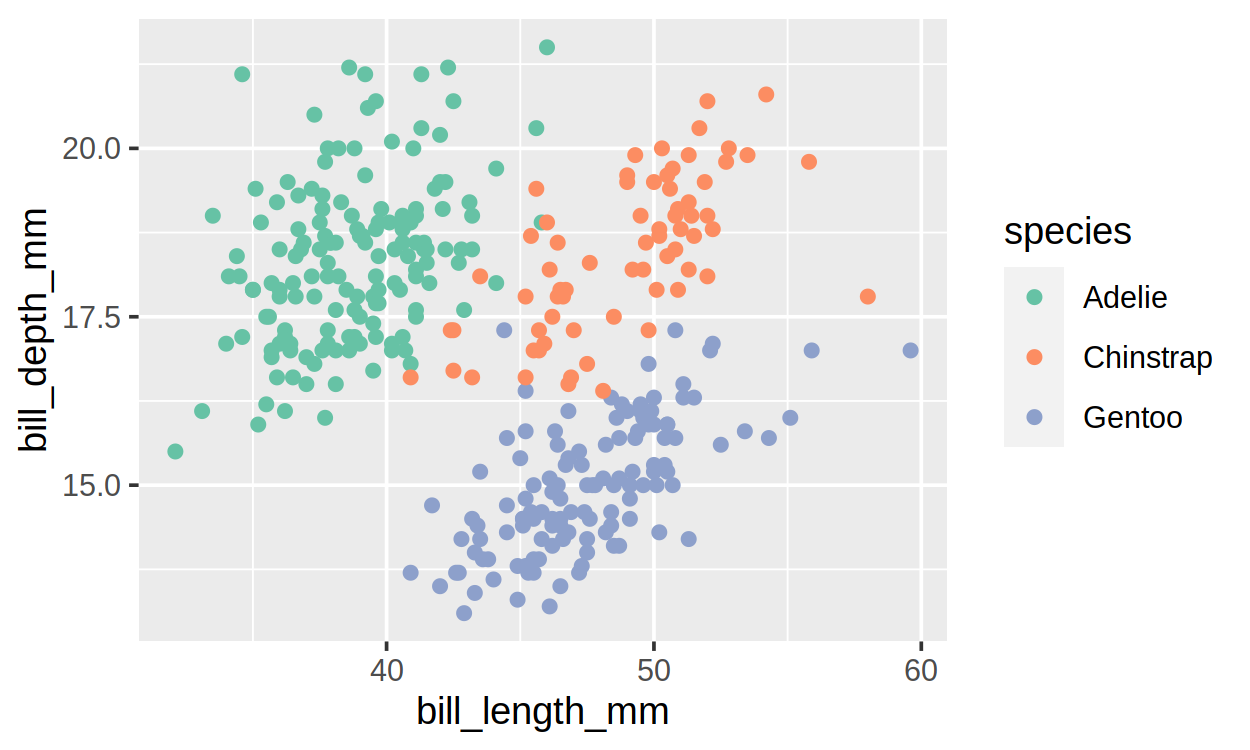

In [13]:
# Hint: Jupyter let's you tab-complete argument names

options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 250)

p = ggplot(
    data = penguins, # "data"
    mapping = aes(x = bill_length_mm, y = bill_depth_mm, color = species) # "mapping"
)

p = p + geom_point() + scale_color_brewer(palette = "Set2")

p

If using argument names, position does not matter.

Warning message:
“Removed 2 rows containing missing values (geom_point).”


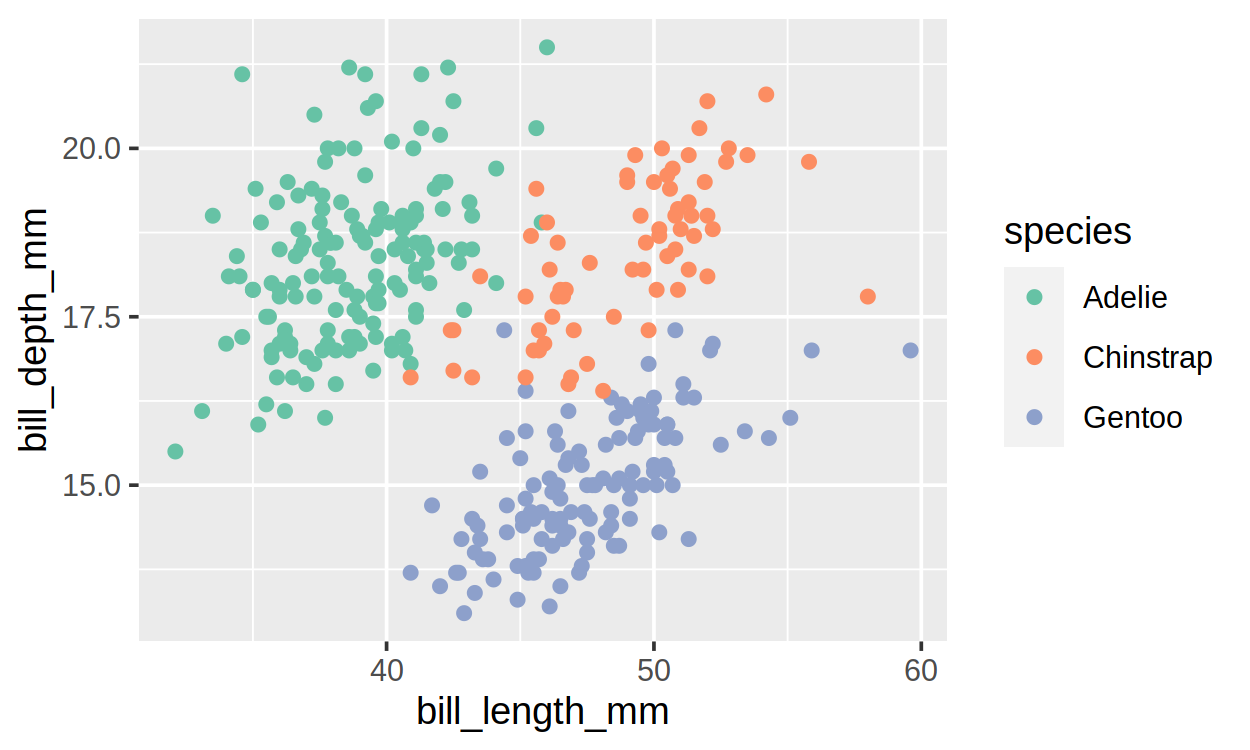

In [14]:
# Hint: Jupyter let's you tab-complete argument names

options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 250)

p = ggplot(
    mapping = aes(x = bill_length_mm, y = bill_depth_mm, color = species), # "mapping"
    data = penguins # "data"
)

p = p + geom_point() + scale_color_brewer(palette = "Set2")

p

## Running a function for each item in a series

[map_dfr](https://purrr.tidyverse.org/reference/map.html)

In [15]:
library('googlesheets4')
gs4_deauth()

In [16]:
read_sheet('1U6Cf_qEOhiR9AZqTqS3mbMF3zt2db48ZP5v3rkrAEJY', sheet = 'Africa') |> head()

✔ Reading from gapminder.

✔ Range ''Africa''.



country,continent,year,lifeExp,pop,gdpPercap
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Algeria,Africa,1952,43.077,9279525,2449.008
Algeria,Africa,1957,45.685,10270856,3013.976
Algeria,Africa,1962,48.303,11000948,2550.817
Algeria,Africa,1967,51.407,12760499,3246.992
Algeria,Africa,1972,54.518,14760787,4182.664
Algeria,Africa,1977,58.014,17152804,4910.417


In [17]:
regions = c('Africa', 'Americas', 'Asia')

read_region = function(region) {
    local_gs4_quiet() # this make googlesheets4 execute quietly
    read_sheet('1U6Cf_qEOhiR9AZqTqS3mbMF3zt2db48ZP5v3rkrAEJY', sheet = region)
}

gapminder_all_regions = map_dfr(regions, read_region)

gapminder_all_regions |> head()

country,continent,year,lifeExp,pop,gdpPercap
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Algeria,Africa,1952,43.077,9279525,2449.008
Algeria,Africa,1957,45.685,10270856,3013.976
Algeria,Africa,1962,48.303,11000948,2550.817
Algeria,Africa,1967,51.407,12760499,3246.992
Algeria,Africa,1972,54.518,14760787,4182.664
Algeria,Africa,1977,58.014,17152804,4910.417


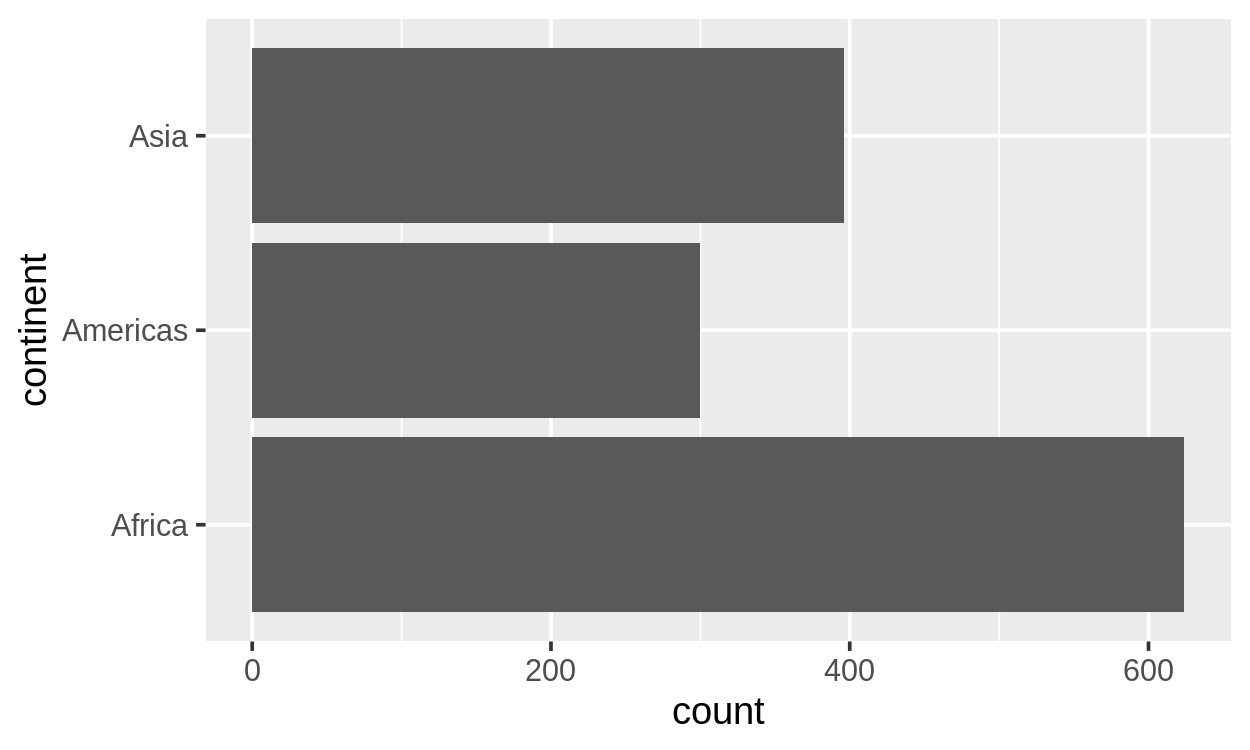

In [26]:
p = ggplot(gapminder_all_regions, aes(y = continent)) +
    geom_bar()

p